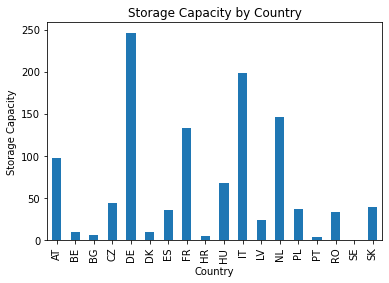

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Read in the data from the CSV file
df = pd.read_csv('./Data/EU_Stroage_data.csv', index_col= 0)

# filter out all rows with "eu" & "UA" as their country code
df = df[df["code"] != 'eu']
df = df[df["code"] != 'UA']

# change Datatype of column
df[['workingGasVolume', 'injection', 'gasInStorage','full', 'trend']]=df[['workingGasVolume', 'injection', 'gasInStorage','full', 'trend']].astype(float)
# Group the data by the 'code' column and calculate the sum of the working gas volume for each group
capacity_by_country = df.groupby('code').max()['workingGasVolume']

# Plot the storage capacity for each country
capacity_by_country.plot.bar()

# Add a title and labels to the plot
plt.title('Storage Capacity by Country')
plt.xlabel('Country')
plt.ylabel('Storage Capacity')

# Show the plot
plt.show()



In [46]:
# Convert the 'gasDayStart' column to a datetime data type
df['gasDayStart'] = pd.to_datetime(df['gasDayStart'])

# Extract the year from the 'gasDayStart' column and create a new 'Year' column
df['Year'] = df['gasDayStart'].dt.year



In [47]:
# Calculate the mean, median, and standard deviation of the working gas volume
mean_capacity = df['workingGasVolume'].mean()
median_capacity = df['workingGasVolume'].median()
std_capacity = df['workingGasVolume'].std()

# Calculate the minimum and maximum working gas volume
min_capacity = df['workingGasVolume'].min()
max_capacity = df['workingGasVolume'].max()

# Calculate the 25th, 50th, and 75th percentiles of the working gas volume
p25_capacity = df['workingGasVolume'].quantile(0.25)
p50_capacity = df['workingGasVolume'].quantile(0.50)
p75_capacity = df['workingGasVolume'].quantile(0.75)

# Print the summary statistics
print(f'Mean working gas volume: {mean_capacity:.2f}  TWh')
print(f'Median working gas volume: {median_capacity:.2f}  TWh')
print(f'Standard deviation of working gas volume: {std_capacity:.2f}  TWh')
print(f'Minimum working gas volume: {min_capacity:.2f}  TWh')
print(f'Maximum working gas volume: {max_capacity:.2f}  TWh')
print(f'25th percentile of working gas volume: {p25_capacity:.2f}  TWh')
print(f'50th percentile of working gas volume: {p50_capacity:.2f}  TWh')
print(f'75th percentile of working gas volume: {p75_capacity:.2f}  TWh')

Mean working gas volume: 61.60  TWh
Median working gas volume: 35.25  TWh
Standard deviation of working gas volume: 69.42  TWh
Minimum working gas volume: 0.01  TWh
Maximum working gas volume: 246.13  TWh
25th percentile of working gas volume: 8.70  TWh
50th percentile of working gas volume: 35.25  TWh
75th percentile of working gas volume: 95.50  TWh


In [48]:
# Group the data by the country ('code') column and calculate the mean, median, and standard deviation, min and max of the storage capacity values for each group
capacity_stats = df.groupby('code').agg({'workingGasVolume': ['mean', 'median', 'std','min','max']})

# Print the summary statistics for each group
print(capacity_stats)

     workingGasVolume                                         
                 mean     median       std       min       max
code                                                          
AT          95.425904   95.50240  0.836827   88.2844   96.9706
BE           8.519149    8.70100  0.491684    7.6100    9.0098
BG           5.805580    5.80250  0.004943    5.8025    5.8135
CZ          40.227305   43.77390  3.929158   35.8139   43.7999
DE         243.335058  243.12555  1.695891  240.1044  246.1328
DK           9.220972    9.23000  0.223418    9.0800    9.9406
ES          35.069886   35.25030  0.385392   34.2480   35.2503
FR         131.291303  131.60780  1.563667  128.4642  133.6026
HR           4.852402    4.77250  0.170683    4.7725    5.2164
HU          67.702700   67.70270  0.000000   67.7027   67.7027
IT         194.606200  193.44340  1.930603  193.4434  197.9497
LV          22.739920   21.80000  1.120724   21.8000   24.0740
NL         140.182335  138.99110  2.558602  138.9411  1

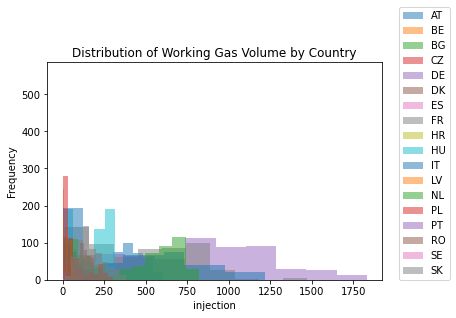

In [50]:
df['injection'] = df['injection'].astype(float)
# Group the data by the 'code' column and select the 'workingGasVolume' column for each group
groups = df.groupby('code')['injection']

# Create a histogram for each group
groups.plot.hist(alpha=0.5, legend=True)

# Add a title and labels to the plot
plt.title('Distribution of Working Gas Volume by Country')
plt.xlabel('injection')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 0.), loc='lower left', borderaxespad=0.)

# Show the plot
plt.show()


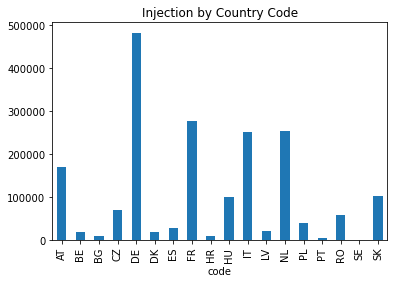

In [51]:
#Interessanter wäre hier die Injektion - weil das Working gas Volumen ja kaum über die Zeit schwankt.

# group the data by 'code' column and select the 'injection' column for each group
grouped_df = df.groupby('code')['injection'].sum()

# make a plot of the grouped data
grouped_df.plot(kind='bar', title='Injection by Country Code')

# show the plot
plt.show()

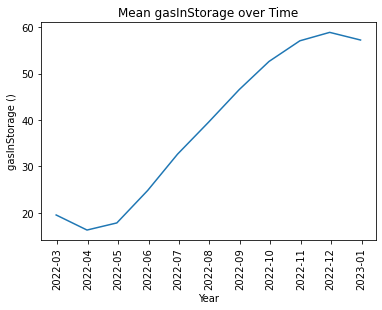

In [55]:

# Convert the 'gasDayStart' column to a datetime data type and set it as the index
df['gasDayStart'] = pd.to_datetime(df['gasDayStart'])
df.set_index('gasDayStart', inplace=True)

# Group the data by month and calculate the mean working gas volume for each month
mean_capacity_by_month = df.resample('M').mean()['gasInStorage']

# Plot the mean working gas volume for each month
plt.plot(mean_capacity_by_month)

# Add a title and labels to the plot
plt.title('Mean gasInStorage over Time')
plt.xlabel('Year')
plt.ylabel('gasInStorage ()')
plt.xticks(rotation=90)

# Show the plo  t
plt.show()


In [56]:

# Calculate the mean, median, and standard deviation of the working gas volume
mean_capacity = df['workingGasVolume'].mean()
median_capacity = df['workingGasVolume'].median()
std_capacity = df['workingGasVolume'].std()

# Calculate the minimum and maximum working gas volume
min_capacity = df['workingGasVolume'].min()
max_capacity = df['workingGasVolume'].max()

# Calculate the 25th, 50th, and 75th percentiles of the working gas volume
p25_capacity = df['workingGasVolume'].quantile(0.25)
p50_capacity = df['workingGasVolume'].quantile(0.50)
p75_capacity = df['workingGasVolume'].quantile(0.75)

# Print the summary statistics
print(f'Mean working gas volume: {mean_capacity:.2f}  TWh')
print(f'Median working gas volume: {median_capacity:.2f}  TWh')
print(f'Standard deviation of working gas volume: {std_capacity:.2f}  TWh')
print(f'Minimum working gas volume: {min_capacity:.2f}  TWh')
print(f'Maximum working gas volume: {max_capacity:.2f}  TWh')
print(f'25th percentile of working gas volume: {p25_capacity:.2f}  TWh')
print(f'50th percentile of working gas volume: {p50_capacity:.2f}  TWh')
print(f'75th percentile of working gas volume: {p75_capacity:.2f}  TWh')


Mean working gas volume: 61.60  TWh
Median working gas volume: 35.25  TWh
Standard deviation of working gas volume: 69.42  TWh
Minimum working gas volume: 0.01  TWh
Maximum working gas volume: 246.13  TWh
25th percentile of working gas volume: 8.70  TWh
50th percentile of working gas volume: 35.25  TWh
75th percentile of working gas volume: 95.50  TWh


In [57]:

# Group the data by the country ('code') column and calculate the mean, median, and standard deviation, min and max of the working gas volume for each group
capacity_stats_by_country = df.groupby('code').agg(['mean', 'median', 'std','min','max'])['workingGasVolume']

# Sort the dataframe by the mean working gas volume in ascending order
capacity_stats_by_country = capacity_stats_by_country.sort_values(by='mean', ascending=False)

# Print the summary statistics
print(capacity_stats_by_country)


            mean     median       std       min       max
code                                                     
DE    243.335058  243.12555  1.695891  240.1044  246.1328
IT    194.606200  193.44340  1.930603  193.4434  197.9497
NL    140.182335  138.99110  2.558602  138.9411  145.6387
FR    131.291303  131.60780  1.563667  128.4642  133.6026
AT     95.425904   95.50240  0.836827   88.2844   96.9706
HU     67.702700   67.70270  0.000000   67.7027   67.7027
CZ     40.227305   43.77390  3.929158   35.8139   43.7999
SK     36.881933   36.04760  1.257626   35.0476   38.8476
PL     36.269223   36.41030  0.260801   35.7879   36.4103
ES     35.069886   35.25030  0.385392   34.2480   35.2503
RO     32.830373   32.79360  0.076824   32.7936   32.9906
LV     22.739920   21.80000  1.120724   21.8000   24.0740
DK      9.220972    9.23000  0.223418    9.0800    9.9406
BE      8.519149    8.70100  0.491684    7.6100    9.0098
BG      5.805580    5.80250  0.004943    5.8025    5.8135
HR      4.8524

C:\Users\johan\AppData\Local\Temp\ipykernel_18640\2373778348.py:2: FutureWarning: ['name', 'url', 'withdrawal', 'netWithdrawal', 'injectionCapacity', 'withdrawalCapacity', 'status', 'trend', 'full', 'info'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  capacity_stats_by_country = df.groupby('code').agg(['mean', 'median', 'std','min','max'])['workingGasVolume']


In [58]:
# calculate the mean, median and standard deviation of the 'injection' column
injection_mean = df['injection'].mean()
injection_median = df['injection'].median()
injection_std = df['injection'].std()

# calculate the minimum and maximum of 'injection'
injection_min = df['injection'].min()
injection_max = df['injection'].max()

# calculate the 25th, 50th, and 75th percentiles of 'injection'
injection_25 = df['injection'].quantile(0.25)
injection_50 = df['injection'].quantile(0.50)
injection_75 = df['injection'].quantile(0.75)

# print the results
print(f'Minimum injection: {injection_min:.2f} GWh')
print(f'Maximum injection: {injection_max:.2f} GWh')
print(f'25th percentile injection: {injection_25:.2f} GWh')
print(f'50th percentile injection: {injection_50:.2f} GWh')
print(f'75th percentile injection: {injection_75:.2f} GWh')
print(f'Mean injection: {injection_mean:.2f} GWh')
print(f'Median injection: {injection_median:.2f} GWh')
print(f'Standard Deviation injection: {injection_std:.2f} GWh')

Minimum injection: 0.00 GWh
Maximum injection: 1831.77 GWh
25th percentile injection: 5.37 GWh
50th percentile injection: 53.89 GWh
75th percentile injection: 218.83 GWh
Mean injection: 176.94 GWh
Median injection: 53.89 GWh
Standard Deviation injection: 274.38 GWh


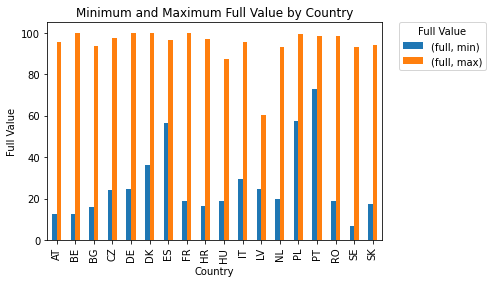

In [62]:

# Read in the data from the CSV file
#df = pd.read_csv('EU_Storage_data.csv')

# Group the data by the country ('code') column and calculate the maximum and minimum full value for each group
min_max_full_by_country = df.groupby('code').agg({'full': ['min', 'max']})

# Plot the maximum and minimum full value for each country
min_max_full_by_country.plot.bar()

# Add a title and labels to the plot
plt.title('Minimum and Maximum Full Value by Country')
plt.xlabel('Country')
plt.ylabel('Full Value')

# Add a legend to the plot and move it to the side
plt.legend(title='Full Value', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


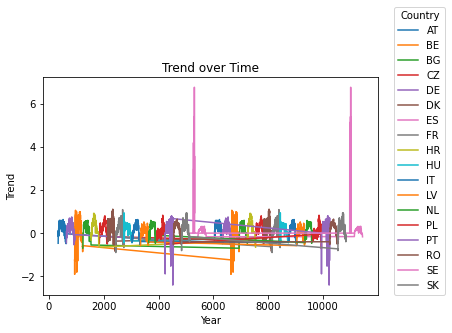

In [74]:

# Convert the 'gasDayStart' column to a datetime data type and set it as the index
#df['gasDayStart'] = pd.to_datetime(df['gasDayStart'])
#df.set_index('gasDayStart', inplace=True)

# Group the data by the 'code' column and plot the trend over time for each group
df.groupby('code')['trend'].plot()

# Add a title and labels to the plot
plt.title('Trend over Time')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.legend(title='Country', bbox_to_anchor=(1.05, 0.), loc='lower left', borderaxespad=0.)

# Show the plot
plt.show()


In [76]:
# Calculate the correlations between all pairs of variables
correlations = df.corr()

# Print the correlations
print(correlations)


                  gasInStorage  consumption  consumptionFull  injection  \
gasInStorage          1.000000     0.817317         0.151138   0.627824   
consumption           0.817317     1.000000        -0.169380   0.670982   
consumptionFull       0.151138    -0.169380         1.000000   0.041710   
injection             0.627824     0.670982         0.041710   1.000000   
workingGasVolume      0.860271     0.910818         0.047886   0.750686   
trend                 0.036185    -0.003594         0.027690   0.315545   
full                  0.313968     0.087755         0.193284  -0.022152   

                  workingGasVolume     trend      full  
gasInStorage              0.860271  0.036185  0.313968  
consumption               0.910818 -0.003594  0.087755  
consumptionFull           0.047886  0.027690  0.193284  
injection                 0.750686  0.315545 -0.022152  
workingGasVolume          1.000000  0.015972 -0.008536  
trend                     0.015972  1.000000  0.047897  
